# Food Delivery Time Prediction Using Linear Regression Model

This project focuses on predicting delivery times for food orders using a linear regression model. By analyzing a dataset containing various factors influencing delivery time, the goal is to provide accurate predictions of the time it will take for a courier to deliver food, thus optimizing customer experience and operational efficiency.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [147]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [148]:
df.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [150]:
df.shape

(1000, 9)

In [151]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

We will convert object data types to categorical data types to simplify modifications and enhance their use in the machine learning model.

In [153]:
df['Weather'] = df['Weather'].astype('category')
df['Traffic_Level'] = df['Traffic_Level'].astype('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

In [154]:
df.dtypes

Order_ID                     int64
Distance_km                float64
Weather                   category
Traffic_Level             category
Time_of_Day               category
Vehicle_Type              category
Preparation_Time_min         int64
Courier_Experience_yrs     float64
Delivery_Time_min            int64
dtype: object

In [155]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

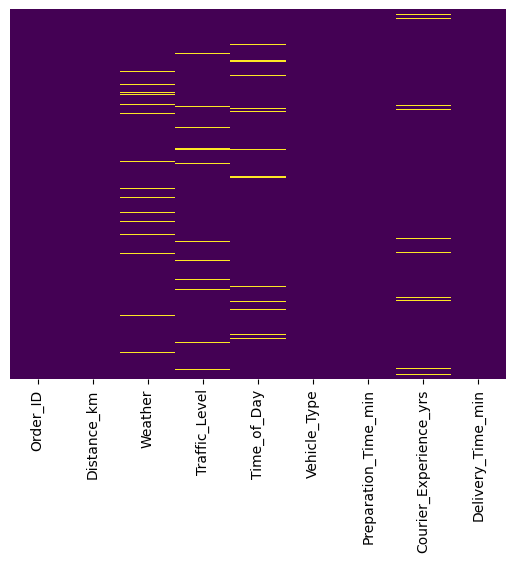

In [156]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [157]:
df.duplicated().sum()

0

In [158]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [159]:
df.describe(include='category')

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,970,970,970,1000
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,470,390,308,503


### Exploratory Data Analysis (EDA)

##### 1- Check distribution of data using Histogram for continuous/numeric features

In [162]:
df.select_dtypes(include='number').columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

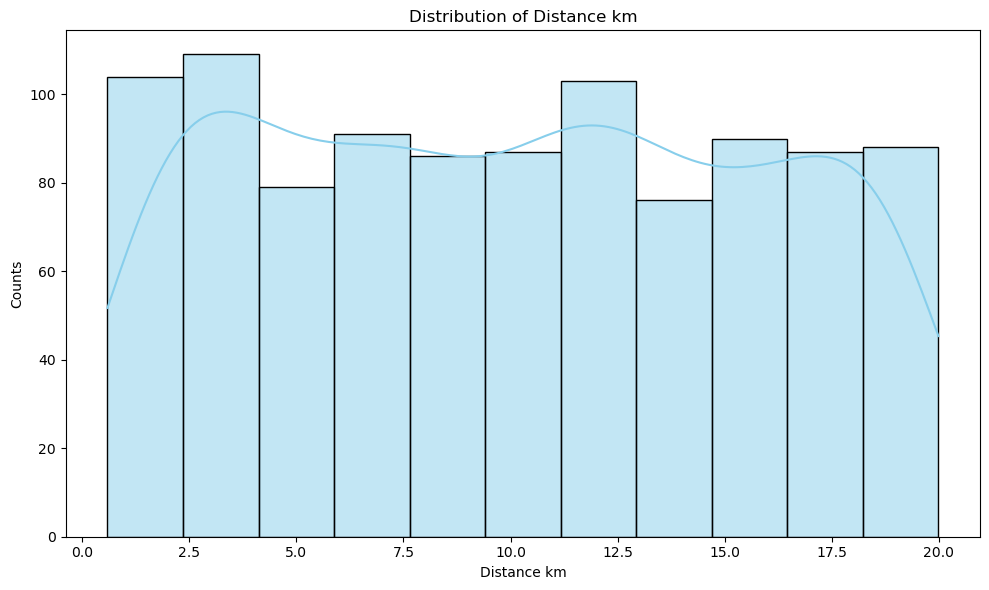

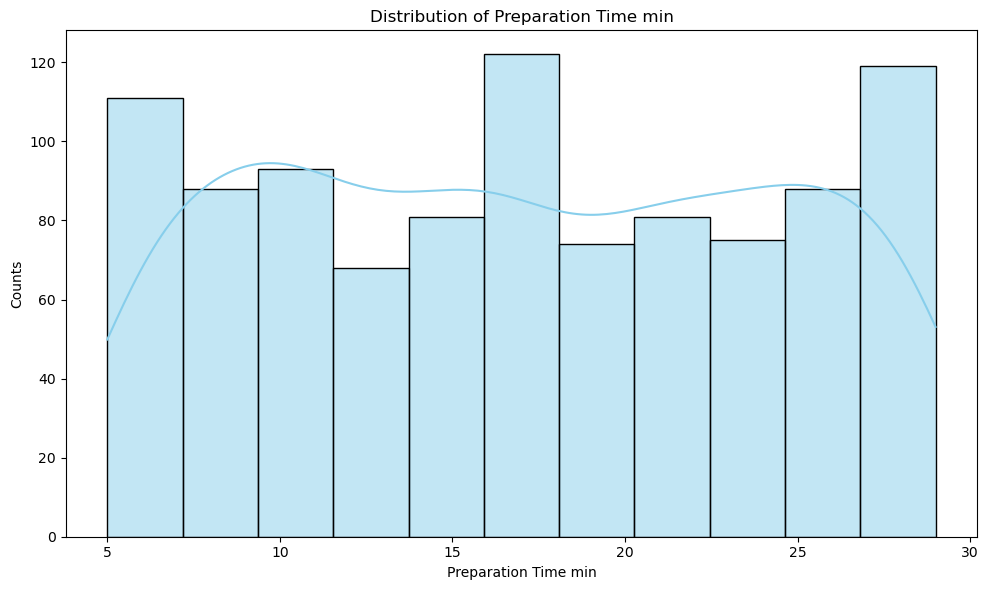

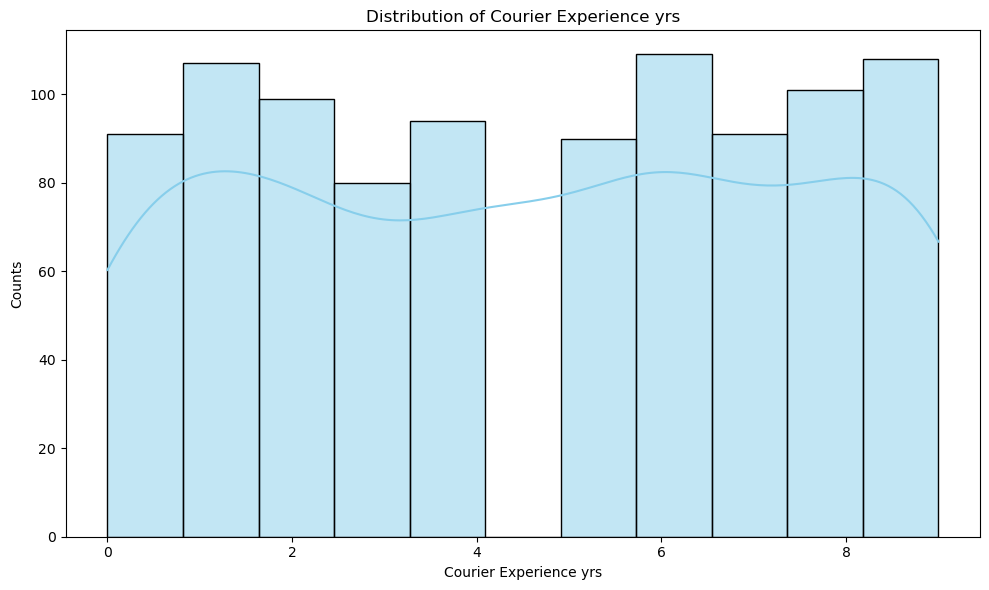

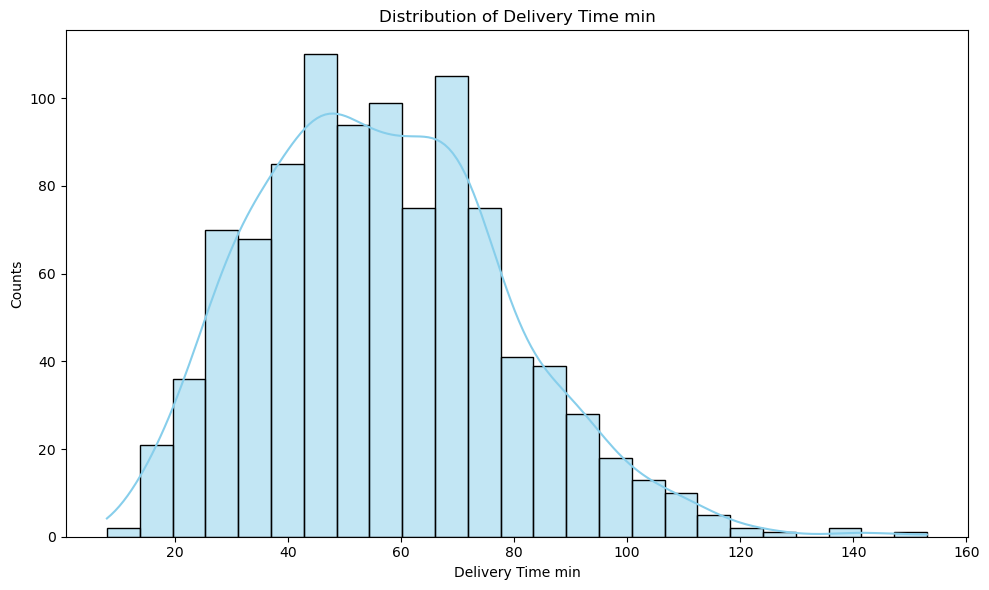

In [163]:
columns = ['Distance_km', 'Preparation_Time_min','Courier_Experience_yrs', 'Delivery_Time_min']

for col in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df,x=col,kde=True,color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ")}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Counts')
    plt.tight_layout()
    plt.show()

There is a positive skew in the Delivery Time min attribute 

##### 2- Check distribution of data using Bar Chart for categorical features

In [166]:
df.select_dtypes(include='category').columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

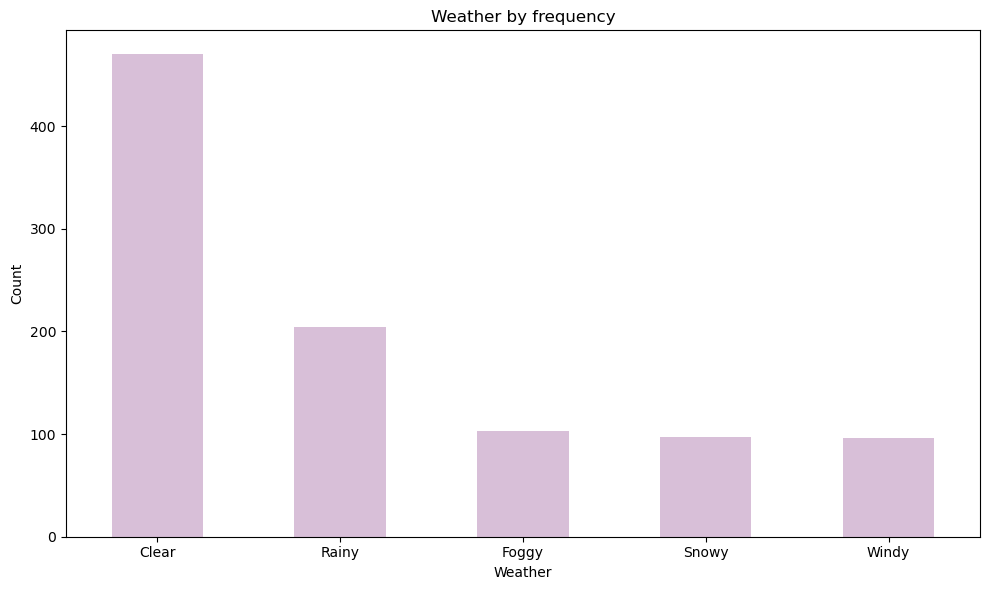

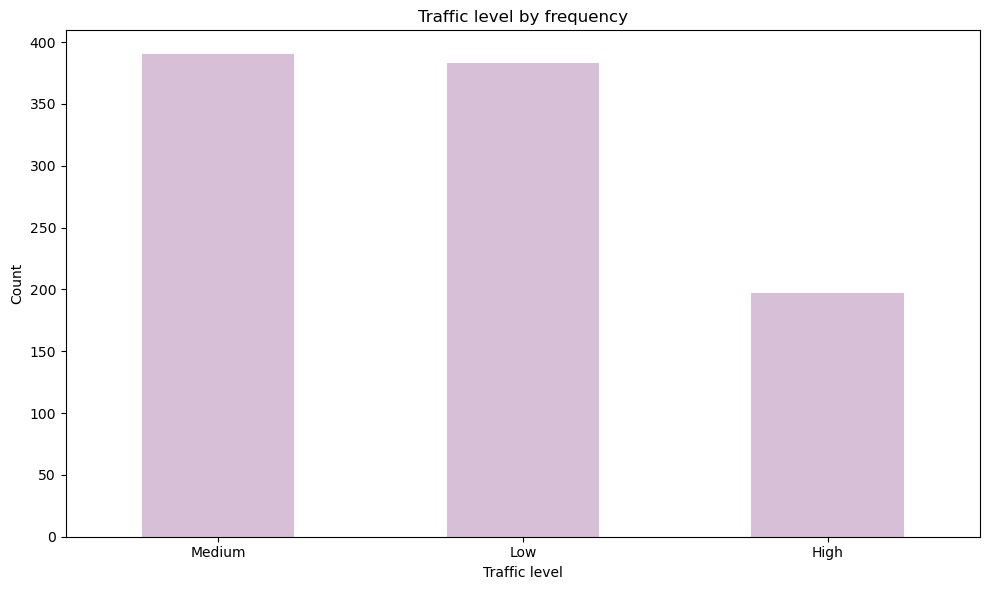

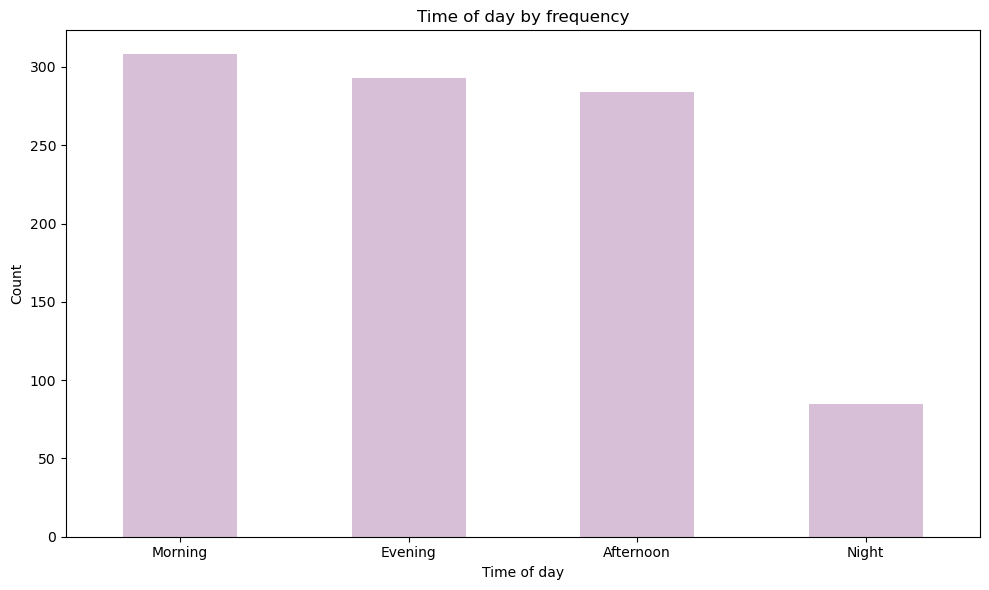

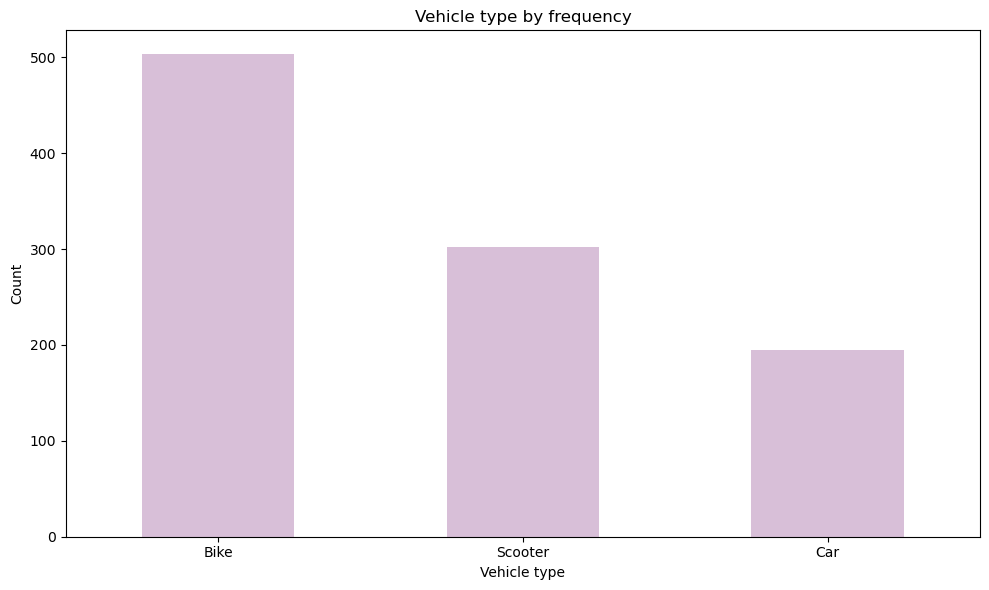

In [167]:
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


for col in columns:
    # Get the value counts
    counts = df[col].value_counts()
    
    plt.figure(figsize=(10,6))
    counts.plot(kind='bar',color='thistle')
    plt.title(f'{col.replace("_", " ").capitalize()} by frequency')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()

##### 3- Box plot to identify outliers

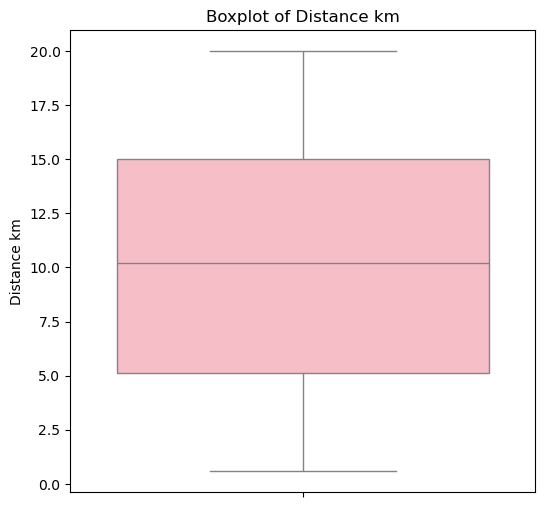

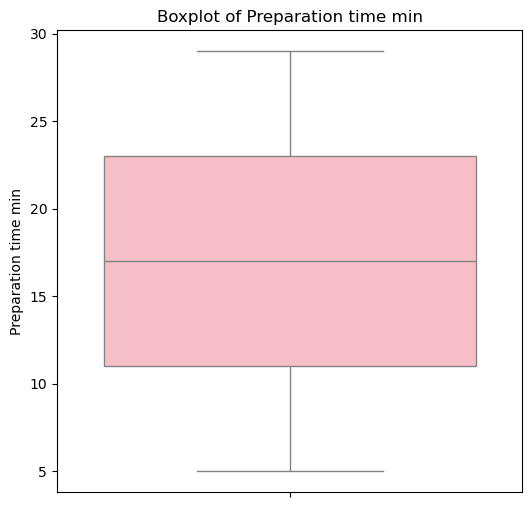

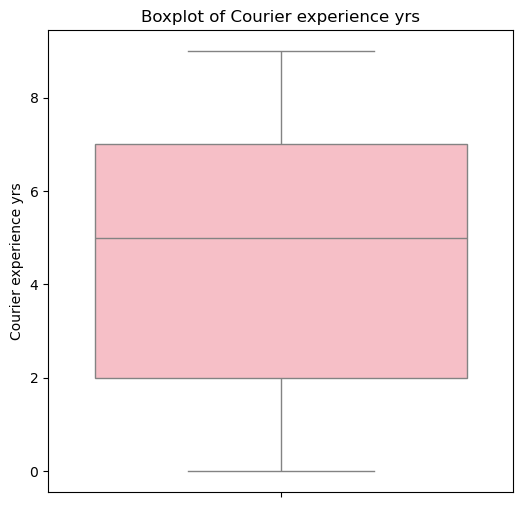

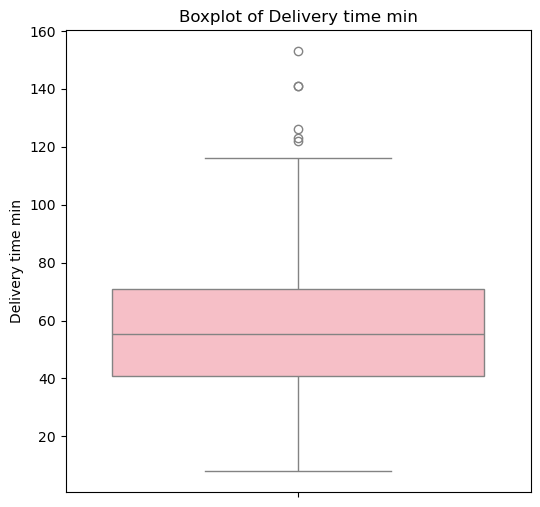

In [169]:
columns = ['Distance_km', 'Preparation_Time_min','Courier_Experience_yrs', 'Delivery_Time_min']
for col in columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df ,y=col ,color='lightpink')
    plt.title(f'Boxplot of {col.replace("_"," ").capitalize()}')
    plt.ylabel(col.replace("_"," ").capitalize())
    plt.show()

There is outliers in the Delivery time min

##### Now we will use boxplots to compare delivery times across different categories ('Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type') to visualize distribution and identify patterns, outliers.

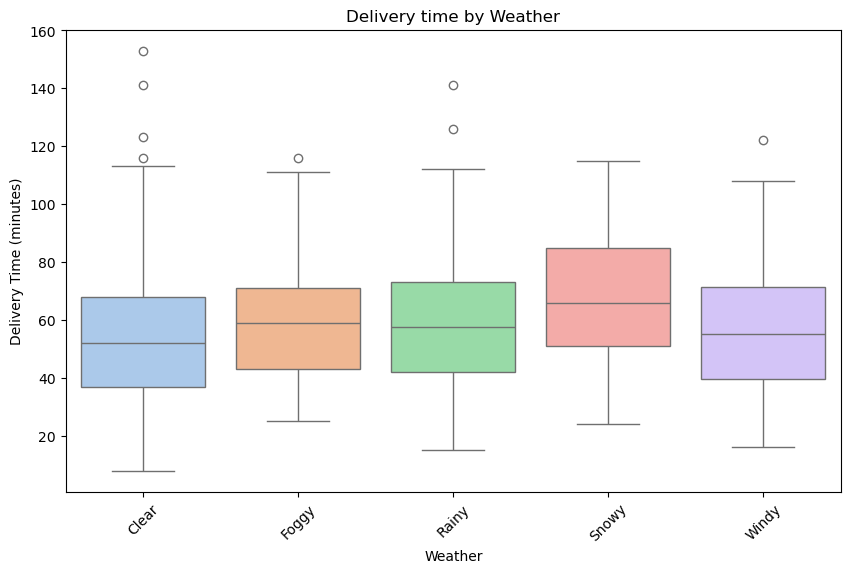

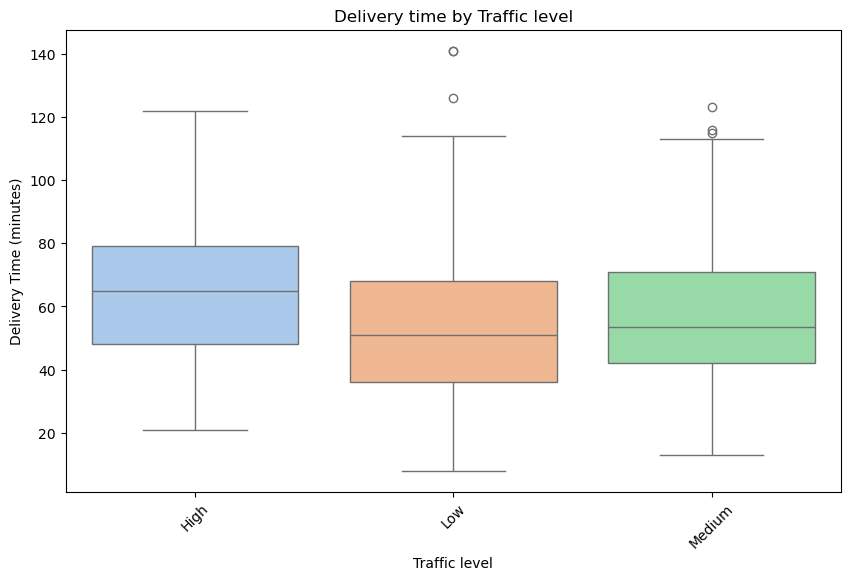

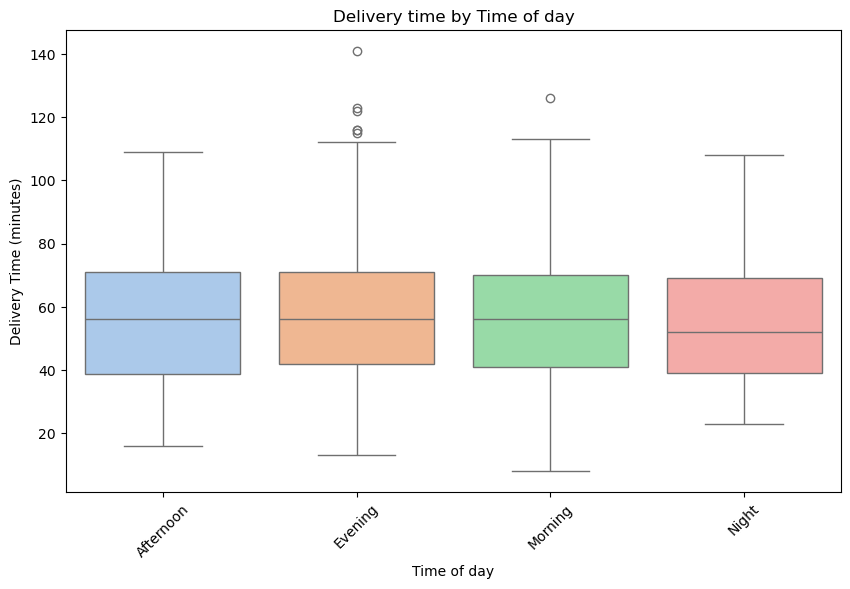

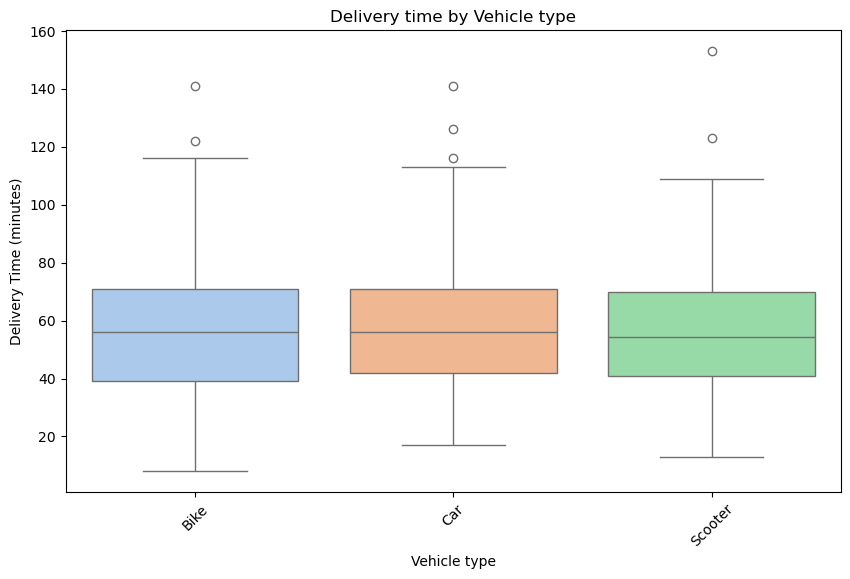

In [172]:
columns= ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'] #categorical features

for col in columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,x=col,y='Delivery_Time_min',palette='pastel') #y variable should be numeric
    plt.title(f"Delivery time by {col.replace("_"," ").capitalize()}")
    plt.xlabel(col.replace("_"," ").capitalize())
    plt.ylabel("Delivery Time (minutes)")
    plt.xticks(rotation=45)
    plt.show()

##### 4- Heatmap (uses correlation matrix for numeric variables to show the relationship between variables)
1 for a perfect positive relationship, -1 for a perfect negative relationship, 0 for no linear relationship.

In [174]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,1.000000,-0.024483,-0.035100,0.013152,-0.036650
Distance_km,-0.024483,1.000000,-0.009037,-0.007842,0.780998
Preparation_Time_min,-0.035100,-0.009037,1.000000,-0.030830,0.307350
Courier_Experience_yrs,0.013152,-0.007842,-0.030830,1.000000,-0.090433
Delivery_Time_min,-0.036650,0.780998,0.307350,-0.090433,1.000000


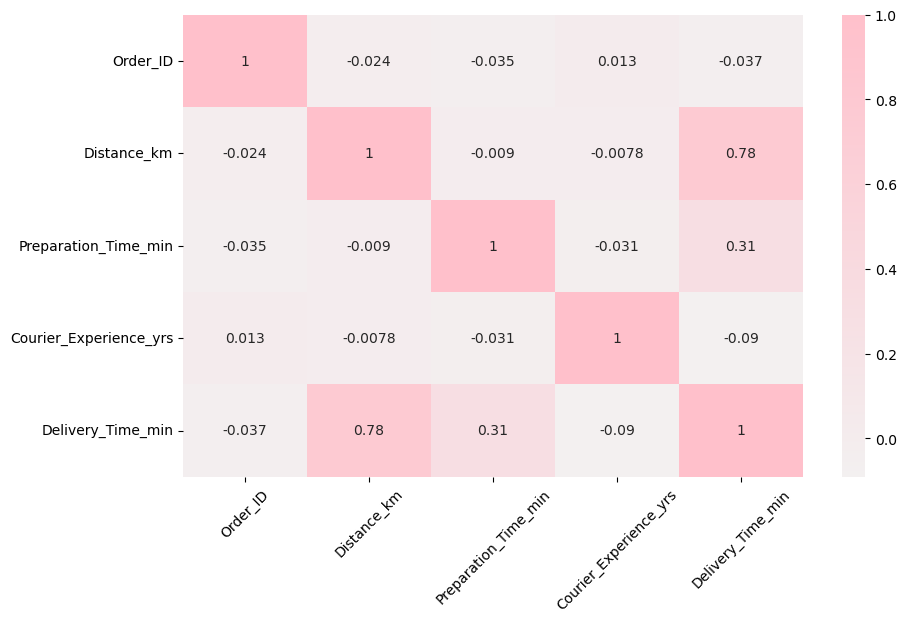

In [175]:
from seaborn import light_palette

pastel_cmap = light_palette("pink", as_cmap=True) 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap=pastel_cmap)
plt.xticks(rotation=45)
plt.show()

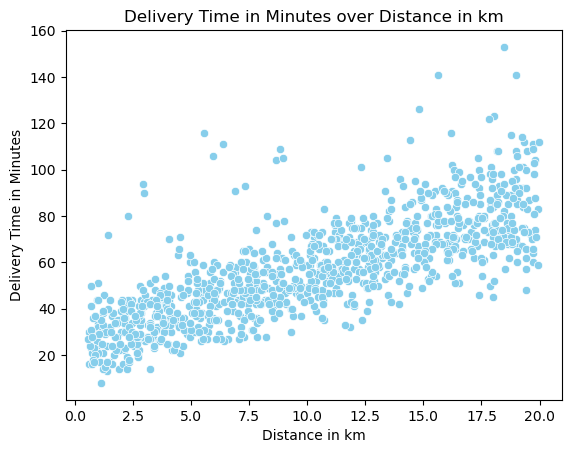

In [176]:
sns.scatterplot(data=df,x='Distance_km',y='Delivery_Time_min',color='skyblue')
plt.title('Delivery Time in Minutes over Distance in km')
plt.xlabel('Distance in km')
plt.ylabel('Delivery Time in Minutes')
plt.show()

The plot shows a positive correlation between delivery time and distance — longer distances lead to longer delivery times.

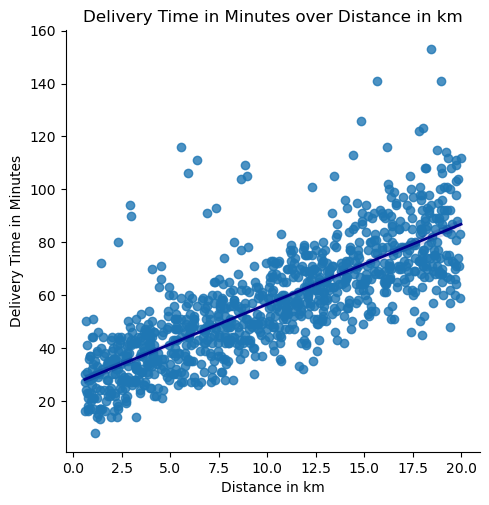

In [178]:
sns.lmplot(data=df, x='Distance_km',y='Delivery_Time_min', line_kws={'color': 'darkblue', 'linewidth': 2})
plt.title('Delivery Time in Minutes over Distance in km')
plt.xlabel('Distance in km')
plt.ylabel('Delivery Time in Minutes')
plt.show()

The regression line shows a clear positive trend: delivery time increases with distance, Points around the line indicate variability.

## Data Preprocessing

### 1- Data Cleaning

##### 1. Handling Missing Values:

In [183]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [184]:
df.select_dtypes(include='category').columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

- Replace missing values in categorical variables with the Mode (Most Frequent Value):

In [186]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)

- Replacing missing values in numerical variables with the mean:

In [188]:
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(),inplace=True)

In [189]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

##### 2. Outliers Treatments

In [191]:
 def wisker(col):
     q1,q3 = np.percentile(col,[25,75])
     iqr = q3 - q1
     lw = q1 - 1.5 * iqr # lower wisker (values less than this are outliers) (min)
     uw = q3 + 1.5 * iqr # upper wisker (values more than this are outliers) (max)
     return lw, uw 

In [192]:
lw,uw = wisker(df['Delivery_Time_min'])

df['Delivery_Time_min'] = np.where(df['Delivery_Time_min']<lw,lw,df['Delivery_Time_min'])
df['Delivery_Time_min'] = np.where(df['Delivery_Time_min']>uw,uw,df['Delivery_Time_min'])

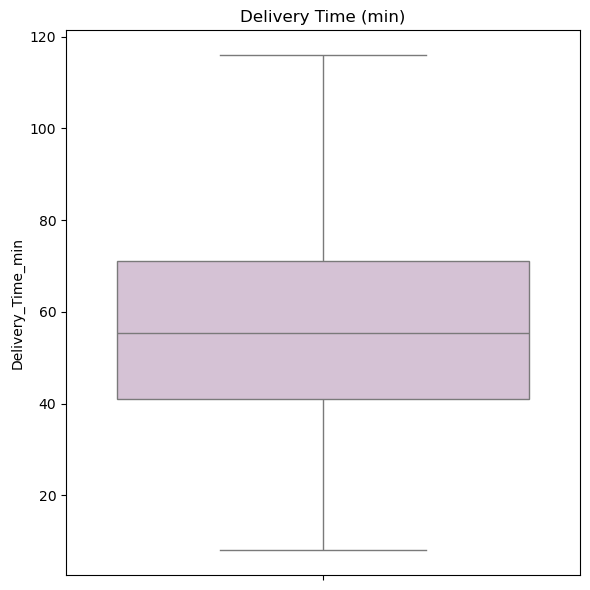

In [193]:
plt.figure(figsize=(6,6))
sns.boxplot(df['Delivery_Time_min'], color='thistle')
plt.title(f'Delivery Time (min)')
plt.tight_layout()
plt.show()

### 2- Normalization (Scaling numerical features)
To ensure all numeric features have the same range, making the data more suitable for machine learning model.

In [195]:
df.select_dtypes(include='number').columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
columns_to_normalize = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
scaler = MinMaxScaler()
df_new = df.copy()
df_new[columns_to_normalize] = scaler.fit_transform(df_new[columns_to_normalize])
df_new.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,0.378351,Windy,Low,Afternoon,Scooter,0.291667,0.111111,43.0
1,738,0.815979,Clear,Medium,Evening,Bike,0.625000,0.222222,84.0
2,741,0.460309,Foggy,Low,Night,Scooter,0.958333,0.111111,59.0
3,661,0.353093,Rainy,Medium,Afternoon,Scooter,0.000000,0.111111,37.0
4,412,0.950515,Clear,Low,Morning,Bike,0.458333,0.555556,68.0


### 3- Encoding (Transforming categorical data into numerical form)

Linear regression requires numerical inputs because it calculates the relationship between the dependent and independent variables using mathematical operations. These operations are not directly applicable to categorical data, So we need to encode categorical features

In [200]:
df.select_dtypes(include='category').columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

- One-Hot Encoding for Nominal features (no order between categories)

In [202]:
final_df = pd.get_dummies(df_new, columns=['Weather', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)
final_df.head()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,0.378351,Low,0.291667,0.111111,43.0,False,False,False,True,False,False,False,False,True
1,738,0.815979,Medium,0.625000,0.222222,84.0,False,False,False,False,True,False,False,False,False
2,741,0.460309,Low,0.958333,0.111111,59.0,True,False,False,False,False,False,True,False,True
3,661,0.353093,Medium,0.000000,0.111111,37.0,False,True,False,False,False,False,False,False,True
4,412,0.950515,Low,0.458333,0.555556,68.0,False,False,False,False,False,True,False,False,False


- Label Encoding for Ordinal features(there’s a meaningful order)

In [204]:
final_df['Traffic_Level_Encoded'] = final_df['Traffic_Level'].cat.codes
final_df.head()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Traffic_Level_Encoded
0,522,0.378351,Low,0.291667,0.111111,43.0,False,False,False,True,False,False,False,False,True,1
1,738,0.815979,Medium,0.625000,0.222222,84.0,False,False,False,False,True,False,False,False,False,2
2,741,0.460309,Low,0.958333,0.111111,59.0,True,False,False,False,False,False,True,False,True,1
3,661,0.353093,Medium,0.000000,0.111111,37.0,False,True,False,False,False,False,False,False,True,2
4,412,0.950515,Low,0.458333,0.555556,68.0,False,False,False,False,False,True,False,False,False,1


In [205]:
final_df.drop(['Order_ID','Traffic_Level'],axis=1 ,inplace=True)
final_df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Traffic_Level_Encoded
0,0.378351,0.291667,0.111111,43.0,False,False,False,True,False,False,False,False,True,1
1,0.815979,0.625000,0.222222,84.0,False,False,False,False,True,False,False,False,False,2
2,0.460309,0.958333,0.111111,59.0,True,False,False,False,False,False,True,False,True,1
3,0.353093,0.000000,0.111111,37.0,False,True,False,False,False,False,False,False,True,2
4,0.950515,0.458333,0.555556,68.0,False,False,False,False,False,True,False,False,False,1


## Building Linear Regression Model

In [207]:
X = final_df.drop(columns='Delivery_Time_min')
X #the input of the model

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Traffic_Level_Encoded
0,0.378351,0.291667,0.111111,False,False,False,True,False,False,False,False,True,1
1,0.815979,0.625000,0.222222,False,False,False,False,True,False,False,False,False,2
2,0.460309,0.958333,0.111111,True,False,False,False,False,False,True,False,True,1
3,0.353093,0.000000,0.111111,False,True,False,False,False,False,False,False,True,2
4,0.950515,0.458333,0.555556,False,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.407732,0.333333,0.333333,False,False,False,False,True,False,False,True,False,0
996,0.808763,0.125000,1.000000,False,True,False,False,False,True,False,False,True,1
997,0.774742,0.875000,0.222222,False,False,True,False,True,False,False,False,True,0
998,0.700000,0.125000,0.000000,False,False,False,False,False,False,False,False,False,1


In [208]:
y = final_df['Delivery_Time_min']
y #the target variable

0      43.0
1      84.0
2      59.0
3      37.0
4      68.0
       ... 
995    54.0
996    71.0
997    81.0
998    55.0
999    58.0
Name: Delivery_Time_min, Length: 1000, dtype: float64

- Split the dataset to trainig and testing sets

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
lr = LinearRegression()

In [214]:
lr.fit(X_train,y_train)

LinearRegression()

In [215]:
c = lr.intercept_
c

19.551345513000555

In [216]:
m= lr.coef_
m

array([57.24050969, 21.56244264, -4.31555368,  6.13746818,  3.49290501,
        7.44602264,  1.33400466,  1.24995004, -0.59035177,  0.19195311,
        1.04076807,  0.057387  , -1.74925822])

We have 13 training features, so we get 13 coefficients

- Now we will evaluate our model using the test set to validate model's reliability and ensure it performs well on new, unseen data. 

In [219]:
y_pred_test = lr.predict(X_test)

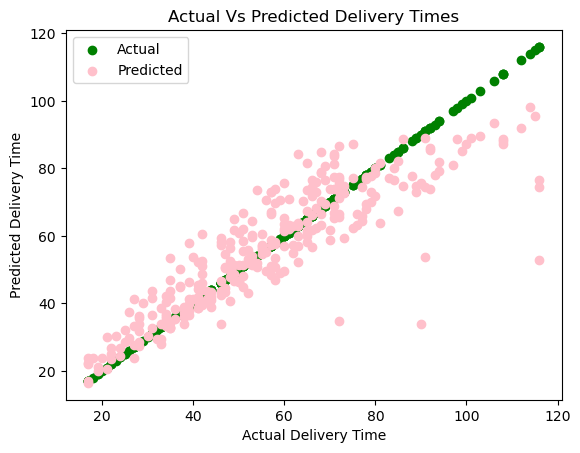

In [220]:
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.scatter(y_test, y_pred_test, c='pink', label='Predicted')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual Vs Predicted Delivery Times')
plt.legend()
plt.show()

## Evaluating the model

In [222]:
from sklearn import metrics
print('R² score: ' + str(metrics.r2_score(y_test, y_pred_test)))
print('MAE: '+ str(metrics.mean_absolute_error(y_test, y_pred_test)))
print('MSE: '+ str(metrics.mean_squared_error(y_test, y_pred_test)))
print('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

R² score: 0.7676105698283031
MAE: 7.195851436058214
MSE: 112.11913123001192
RMSE: 10.58863216992695


- R² score (0.768): The model explains 76.8% of the variation in the data. A good result, but can be improved.
- MAE (7.20): On average, the model's predictions are off by about 7.20 units from the actual values.
- MSE (112.12): The average squared error between predictions and actual values is 112.12. Lower value is better.
- RMSE (10.59): The average prediction error is about 10.59 units. It shows how big the errors are in the same scale as the data.
  
The model performs decently but could be improved by reducing prediction errors.